# Practice Exercise - Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us.

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

### Load the dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Week 6 - ML: Linear Regression/boston.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Check the shape of the dataset

In [6]:
df.shape

(506, 13)

### Get the info regarding column datatypes

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Get summary statistics for the numerical columns

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

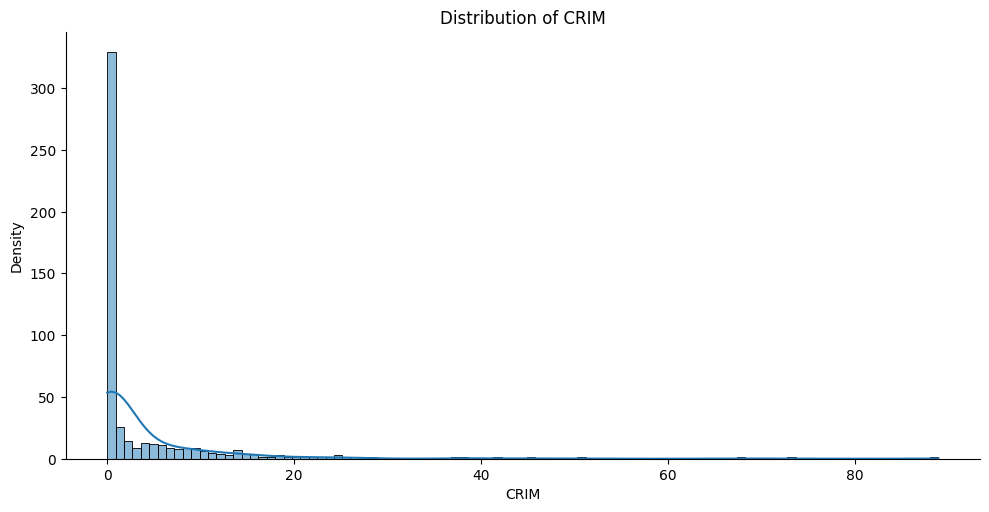

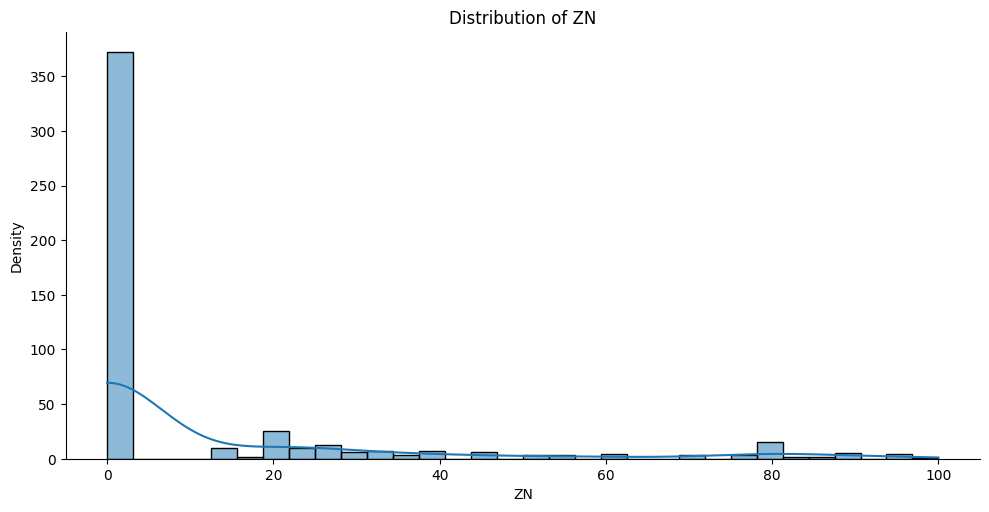

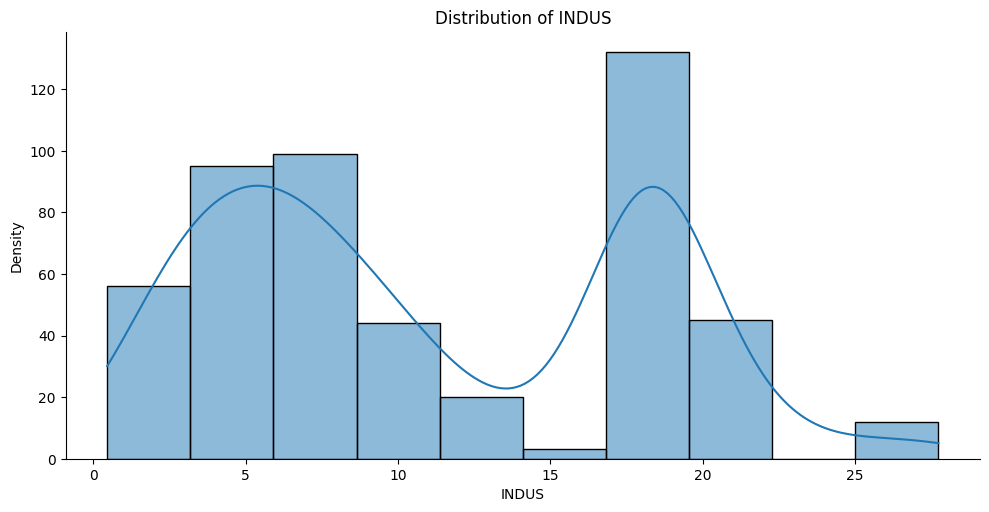

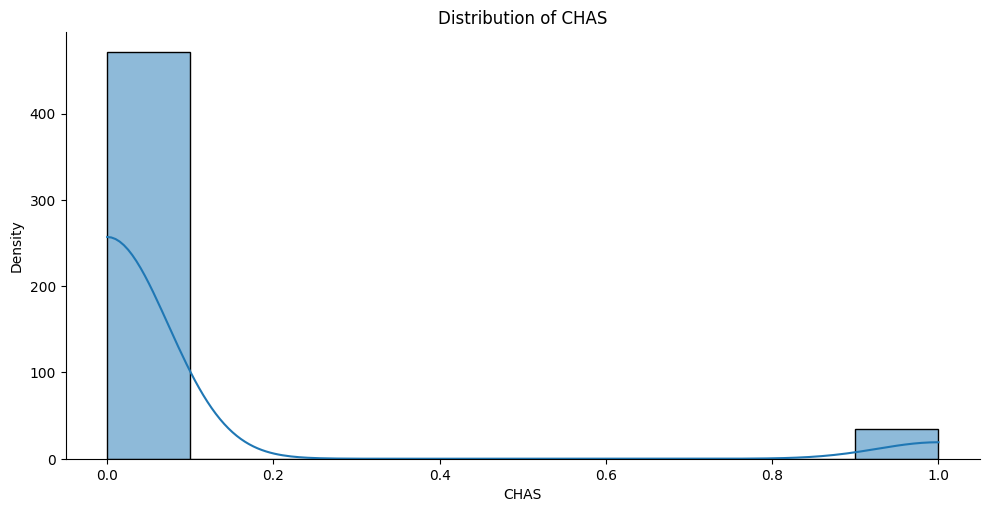

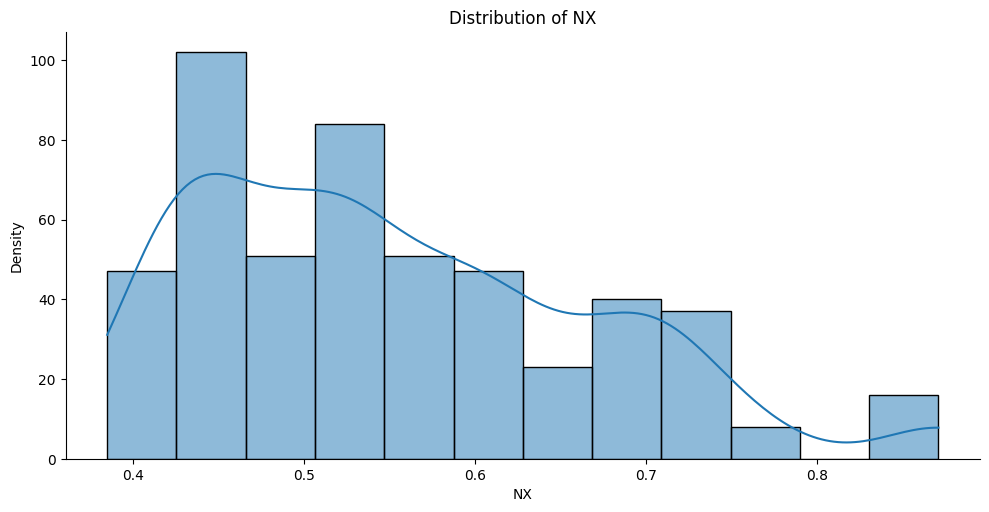

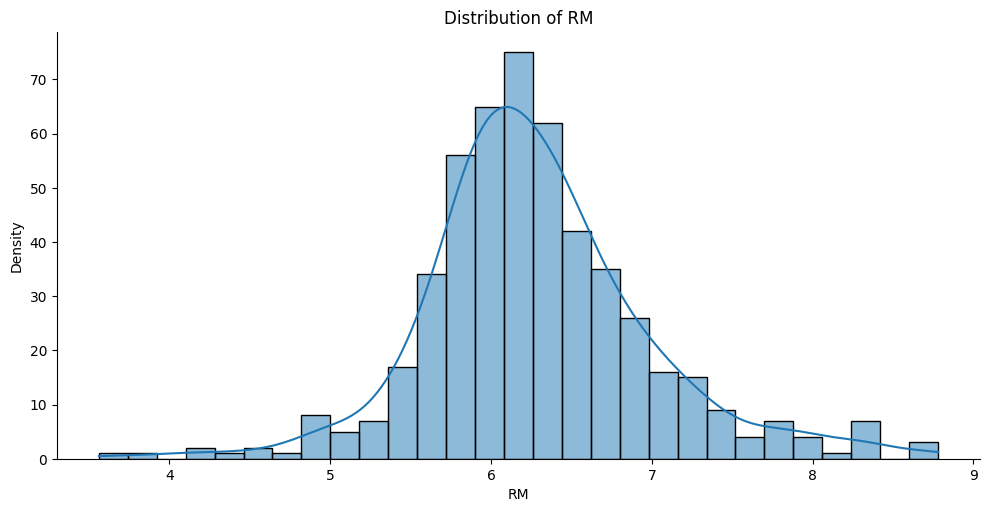

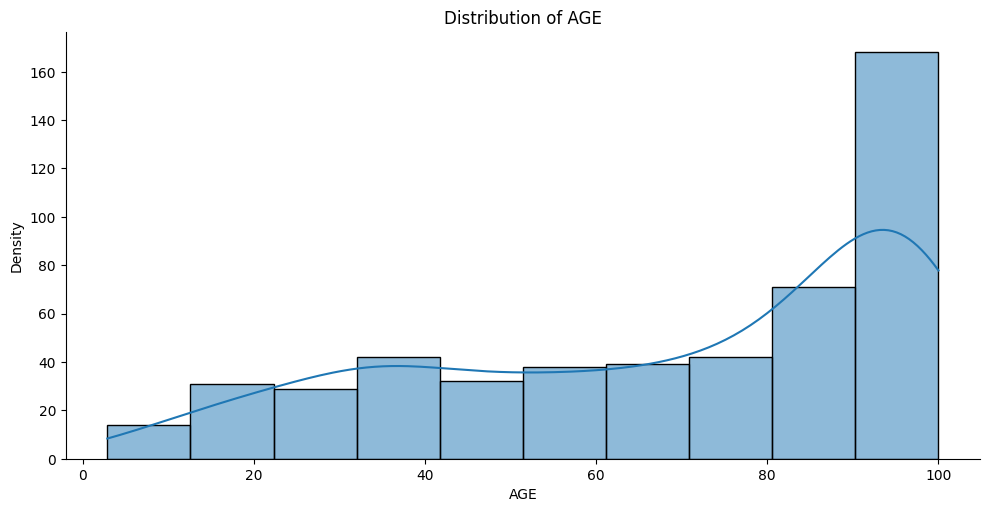

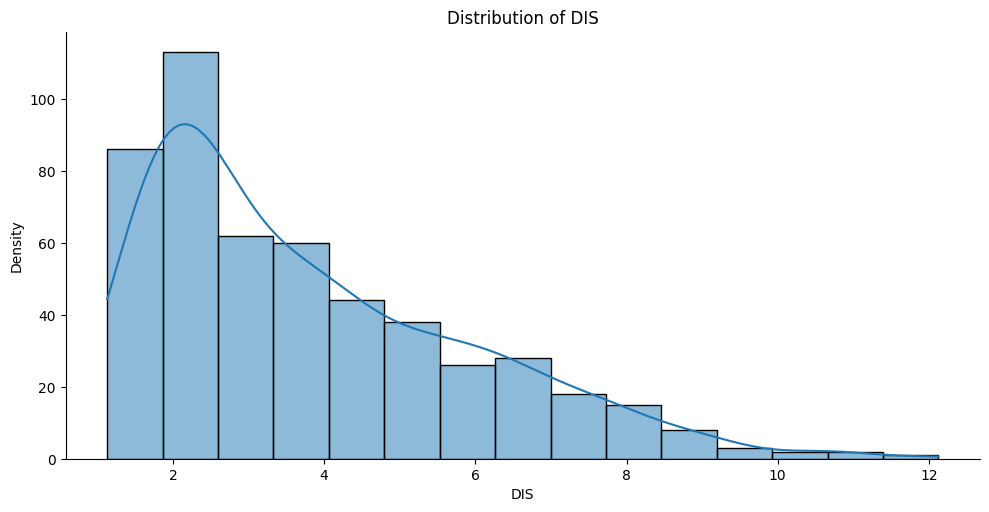

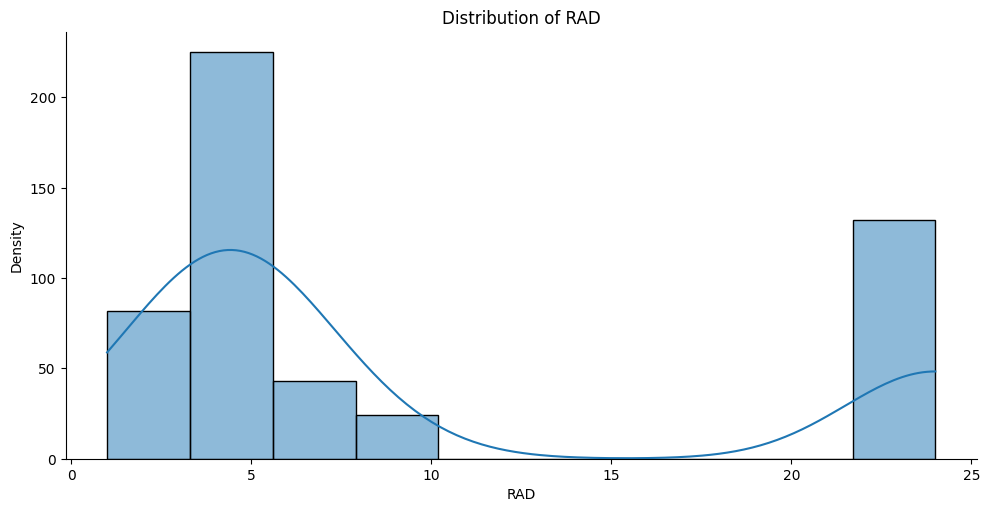

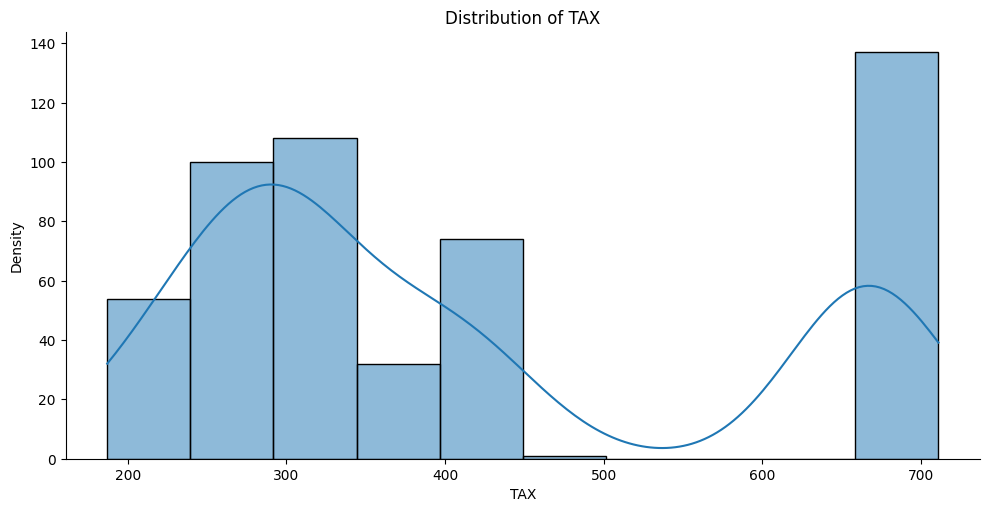

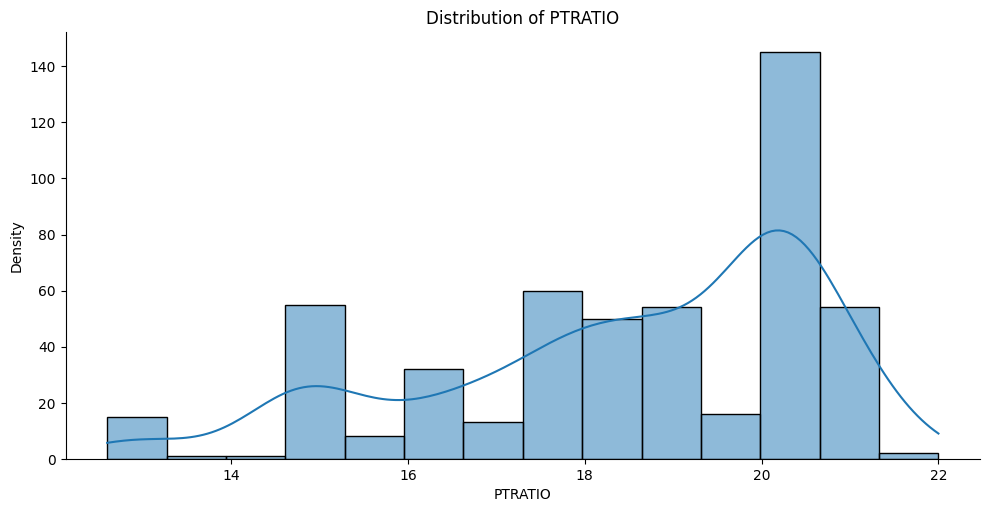

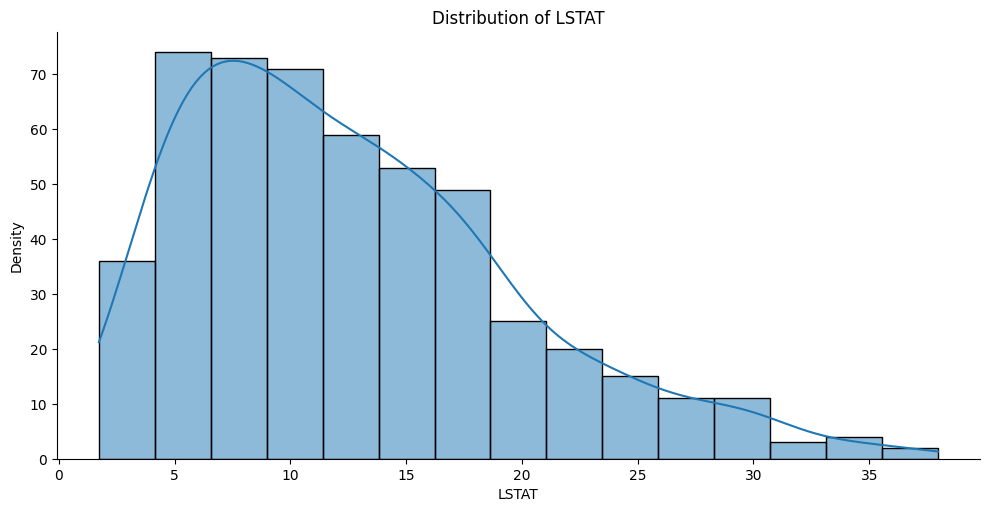

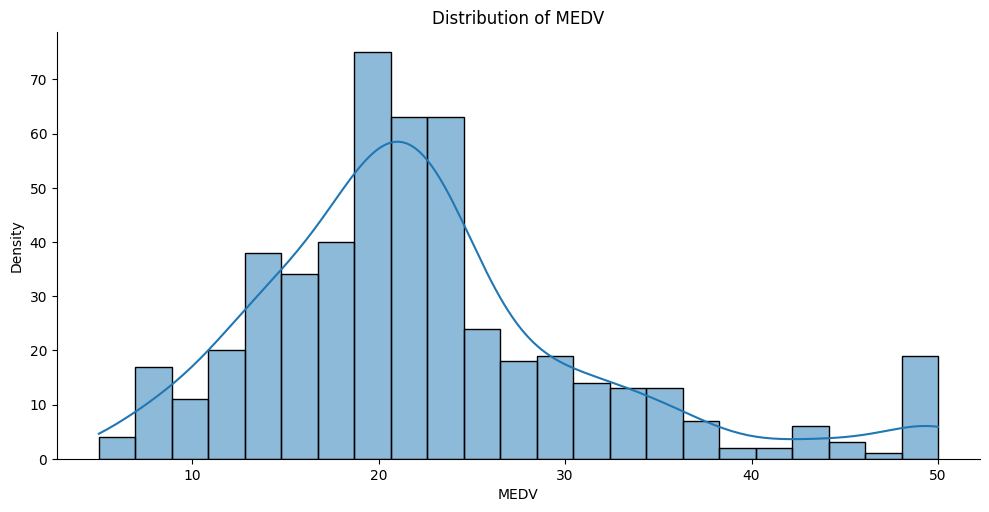

In [9]:
# Identify numerical features (excluding any categorical or identifier columns if present)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot distribution plots for each numerical feature
for feature in numerical_features:
    sns.displot(df[feature], kde=True, aspect=2)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

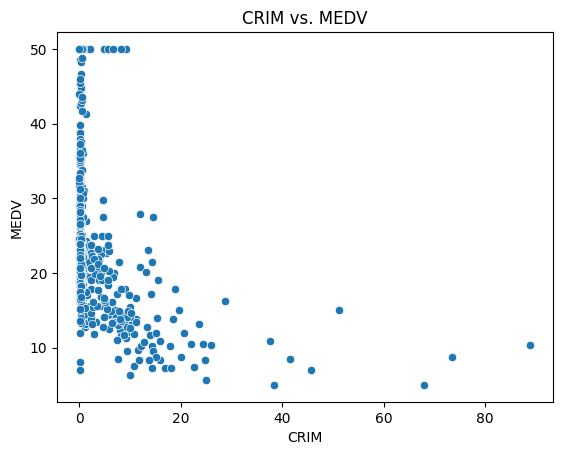

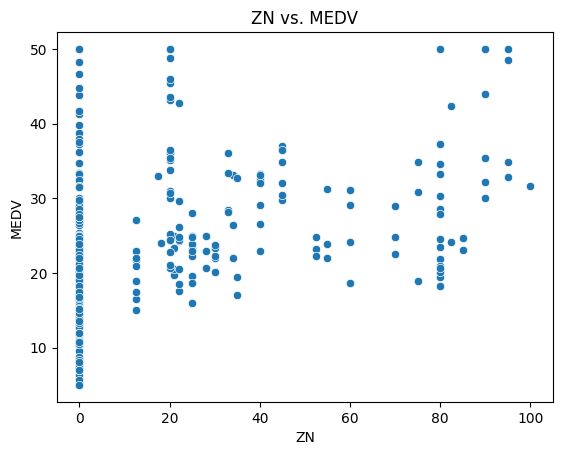

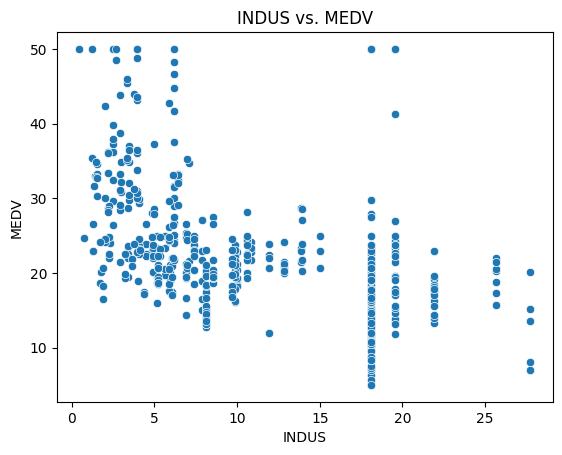

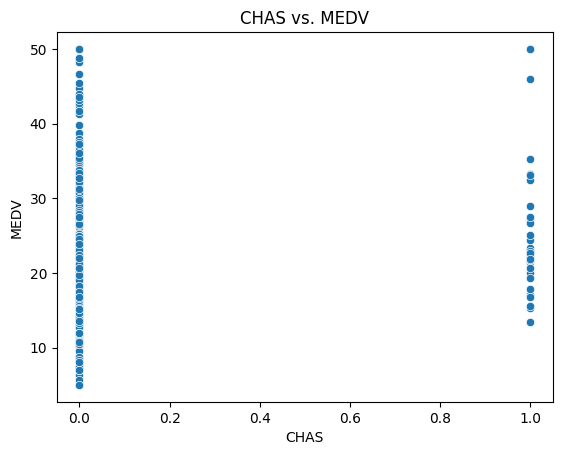

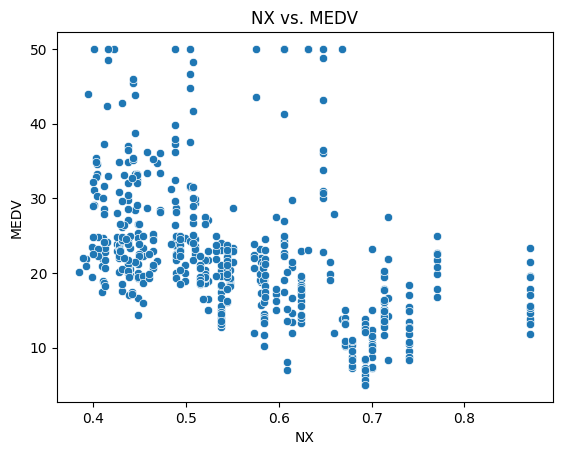

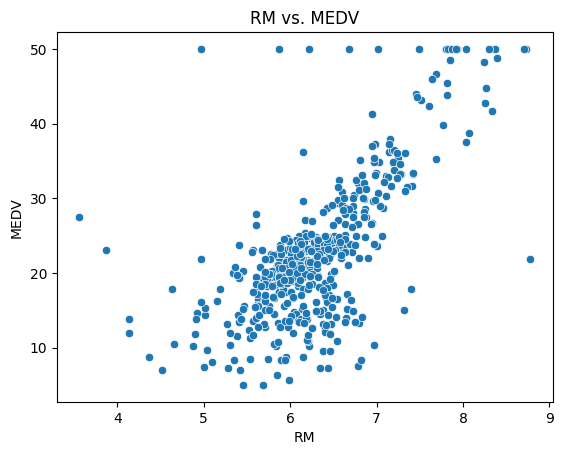

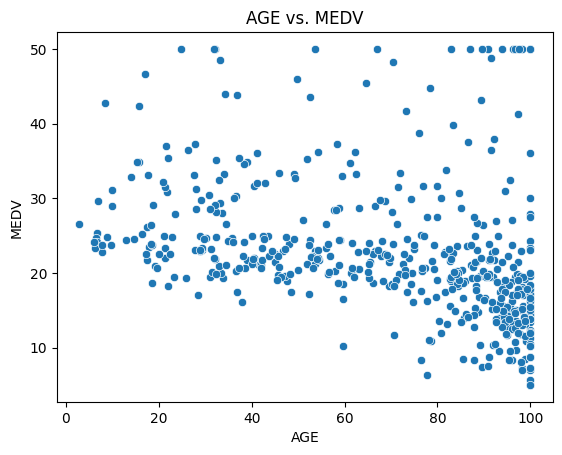

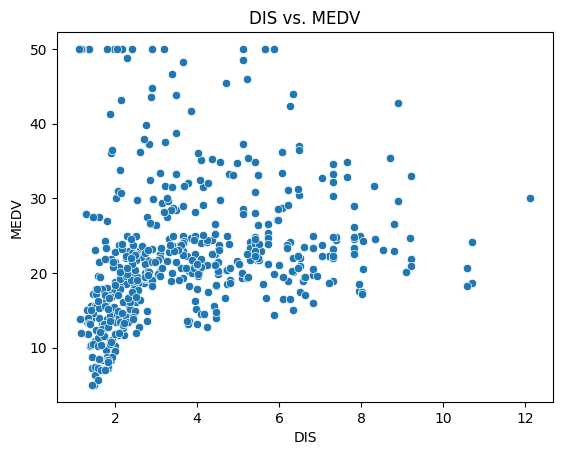

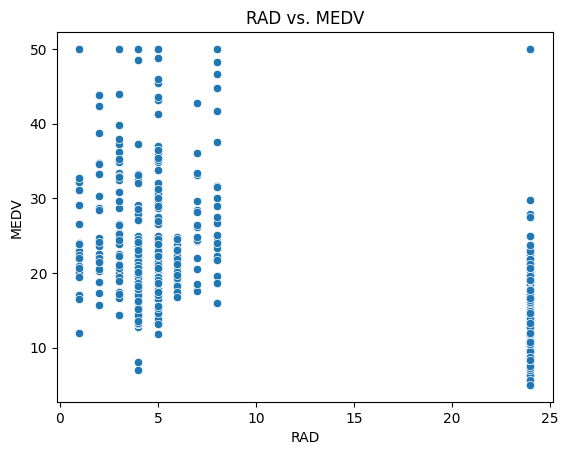

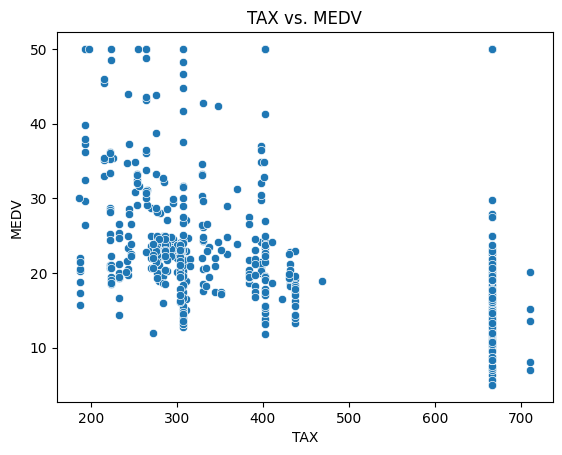

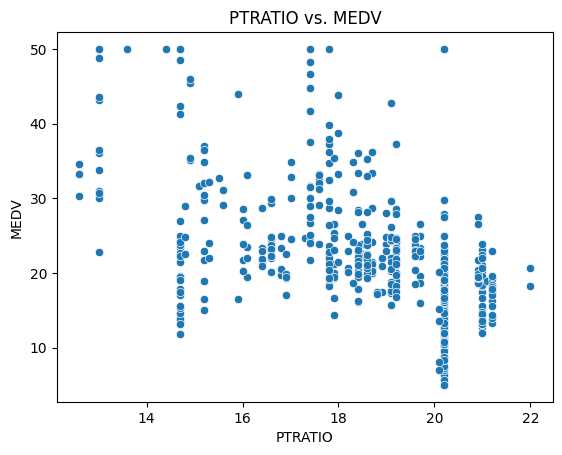

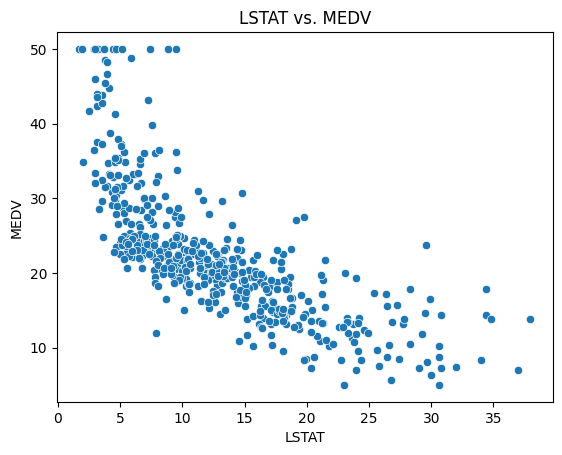

In [10]:

# Assuming your target variable is 'MEDV' and it's included in the dataframe
target_variable = 'MEDV'

# Identify all features excluding the target variable
features = df.columns.tolist()
features.remove(target_variable)

# Plot scatterplots for each feature against the target variable
for feature in features:
    sns.scatterplot(data=df, x=feature, y=target_variable)
    plt.title(f'{feature} vs. {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.show()


**Plot the correlation heatmap and list your observations.**

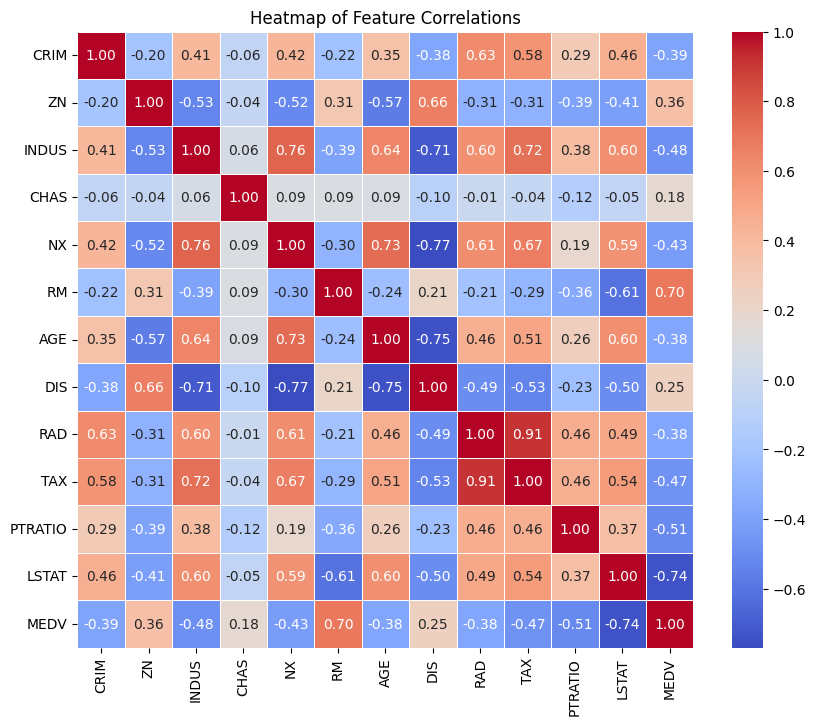

In [11]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8)) # You can adjust the size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

### Split the dataset

Split the data into the dependent and independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [12]:
# prompt: 1

# Assuming your target variable is 'MEDV' and it's included in the dataframe
target_variable = 'MEDV'

# Identify all features excluding the target variable
features = df.columns.tolist()
features.remove(target_variable)

# Split the data into dependent and independent variables
X = df[features]
y = df[target_variable]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Model Building

**Fit the model to the training set**

In [13]:
# prompt:

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**Get the score on training set**

In [14]:
# prompt:

# Get the score on training set
score = model.score(X_train, y_train)
print('Training Score:', score)


Training Score: 0.7340777261931662


**Write your own function for the R-squared score.**

In [15]:
# prompt:

import numpy as np
def r_squared(y_true, y_pred):
  """
  Calculates the R-squared score for regression models.

  Args:
    y_true: The true values of the target variable.
    y_pred: The predicted values of the target variable.

  Returns:
    The R-squared score.
  """

  # Calculate the mean of the true values
  mean_true = np.mean(y_true)

  # Calculate the sum of squared errors (SSE)
  sse = np.sum((y_true - y_pred) ** 2)

  # Calculate the sum of squared total (SST)
  sst = np.sum((y_true - mean_true) ** 2)

  # Calculate the R-squared score
  r2 = 1 - (sse / sst)

  return r2


**Get the score on test set**

In [16]:
# prompt:

# Get the predictions on test set
y_pred = model.predict(X_test)

# Calculate the R-squared score
r2 = r_squared(y_test, y_pred)
print('Test Score:', r2)


Test Score: 0.7166209449097798


**Get the RMSE on test set**

In [16]:
# prompt:

import numpy as np
# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print('Test RMSE:', rmse)


**Get the model coefficients.**

In [17]:
# prompt:

# Get the model coefficients
coefficients = model.coef_
print('Coefficients:', coefficients)


Coefficients: [-1.39806261e-01  3.61191791e-02  3.62981883e-02  3.46492251e+00
 -1.59831769e+01  3.89980705e+00 -8.87065929e-03 -1.38856394e+00
  2.19830162e-01 -9.20022754e-03 -8.90506364e-01 -5.73644177e-01]


**Automate the equation of the fit**

In [18]:
# prompt:

# Create a list of feature names and coefficients
feature_coefficients = list(zip(features, coefficients))

# Sort the features by their absolute coefficient values in descending order
sorted_coefficients = sorted(feature_coefficients, key=lambda x: abs(x[1]), reverse=True)

# Print the equation of the fit
equation = 'MEDV = '
for feature, coefficient in sorted_coefficients:
    if coefficient >= 0:
        equation += f' + {coefficient:.2f}*{feature}'
    else:
        equation += f' - {-coefficient:.2f}*{feature}'

print(equation)


MEDV =  - 15.98*NX + 3.90*RM + 3.46*CHAS - 1.39*DIS - 0.89*PTRATIO - 0.57*LSTAT + 0.22*RAD - 0.14*CRIM + 0.04*INDUS + 0.04*ZN - 0.01*TAX - 0.01*AGE
